## Predicting House Prices in King County, USA
------

Case Study: https://www.kaggle.com/harlfoxem/housesalesprediction

Using various regression methods to predict house prices in King County, USA.

1. Simple Linear Regression
2. Polynomial Regression


### Reading the dataset and importing modules

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import warnings

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

warnings.filterwarnings('ignore')

evaluation = pd.DataFrame({'Model': [],
                           'Details': [],
                           'Root Mean Squared Error': [],
                           'R-squared (training)': [],
                           'Adjusted R-squared (train)': [],
                           'R-squared (test)': [],
                           'Adjusted R-squared (test)': [],
                           '5-Fold Cross Validation': []
                        })

df = pd.read_csv("../DATA/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [52]:
df.isnull().sum() # no NA values

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [53]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


### Defining a function for adjusted $R^2$
R-squared increases when the number of features increase, and so because of this it would probably be better to use a more robust evaluator, such as Adjusted R-squared. 

In [54]:
from sklearn.metrics import r2_score

def adjusted_rsquared(r2, p, n):
    return 1 - (1 - r2) * ((n-1) / (n-p-1))

## Simple Linear Regression

Simple Linear Regression is modelling the linear relationship between a response and one explanatory variable. 

I want to predict the house prices, so the response is `price`, and the explanatory variable will be the most important feature, which can be determined by inspecting a correlation matrix.

Therefore, the explanatory variable chosen will be `sqft_living`

In [55]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.002727,0.011536,-0.023803,0.008188,-0.010799,-0.005193,0.021617,-0.016925,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.266398,0.397370,0.036056,0.667951,0.605368,0.323799,0.053953,0.126424,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.006834,0.080008,0.026496,0.356563,0.479386,0.302808,0.155670,0.018389,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063744,0.188386,-0.126479,0.665838,0.686668,0.283440,0.507173,0.050544,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.103854,0.284709,-0.059445,0.762779,0.876448,0.435130,0.318152,0.055308,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021632,0.074900,-0.008830,0.114731,0.184139,0.015418,0.052946,0.007686,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.023755,0.028814,-0.264075,0.458794,0.523989,-0.245715,0.489193,0.006427,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.002727,0.266398,-0.006834,0.063744,0.103854,0.021632,0.023755,1.000000,0.401971,0.016611,0.082888,0.072109,0.080559,-0.026153,0.092873,0.030272,-0.014306,-0.041904,0.086507,0.030781
view,0.011536,0.397370,0.080008,0.188386,0.284709,0.074900,0.028814,0.401971,1.000000,0.045999,0.251728,0.167609,0.277078,-0.053636,0.103951,0.084622,0.005871,-0.078107,0.280681,0.072904
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016611,0.045999,1.000000,-0.146896,-0.158904,0.173849,-0.361592,-0.060788,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# split data into training and testing sets
train, test = train_test_split(df, test_size=0.2)

X_train, y_train = np.array(train['sqft_living']).reshape(-1,1), train['price']
X_test, y_test = np.array(test['sqft_living']).reshape(-1, 1), test['price']

# model
lm = LinearRegression()
lm.fit(X_train,y_train)
pred = lm.predict(X_test)

# metrics
rmse = round(np.sqrt(mean_squared_error(y_test, pred)), 3)
r_sq_train = round(lm.score(X_train, y_train), 3)
r_sq_test = round(lm.score(X_test, y_test), 3)
cv = round(cross_val_score(lm, X_train, y_train, cv=5).mean(), 3)

print(f"Intercept: {round(lm.intercept_, 3)}")
print(f"Coefficients: {lm.coef_}")

# add to evaluation table
r = evaluation.shape[0]
evaluation.loc[r] = ['Simple Linear Regression', '-', rmse, r_sq_train, '-', r_sq_test, '-', cv]

evaluation

Intercept: -41135.59544832283
Coefficients: [279.78669074]


,Model,Details,Root Mean Squared Error,R-squared (training),Adjusted R-squared (train),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Simple Linear Regression,-,257448.237,0.488,-,0.51,-,0.4857


Therefore, using the intercept and coefficient values generated by the model, we can manually estimate house prices. The equation we use for estimations can be formulated as:

$$\text{Price}=279.787*\text{sqft living}-41135.595$$

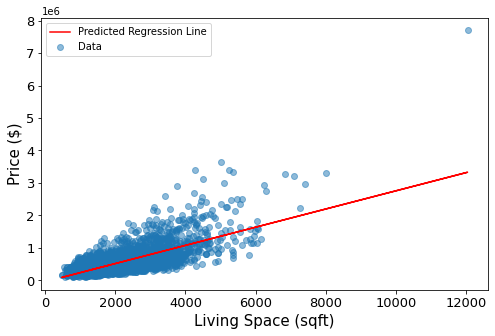

In [97]:
plt.figure(figsize=(8,5))
plt.plot(X_test, lm.predict(X_test), c='red', label='Predicted Regression Line')
plt.scatter(X_test, y_test, alpha=0.5, label='Data')
plt.xlabel('Living Space (sqft)', fontsize=15)
plt.ylabel('Price ($)', fontsize=15)
plt.legend()

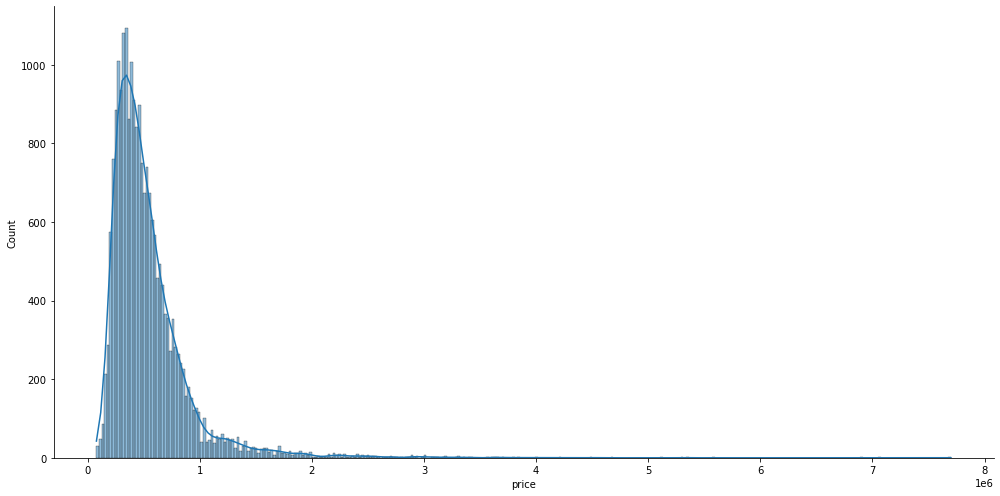

In [7]:
sns.displot(kind='hist', data=df, x='price', aspect=2, height=7, kde=1)

<AxesSubplot: xlabel='bedrooms', ylabel='count'>

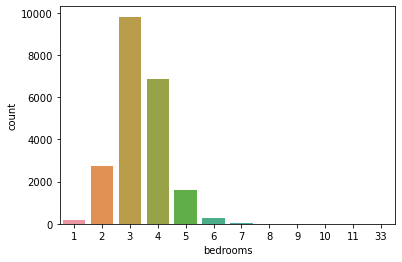

In [8]:
sns.countplot(data=df, x='bedrooms')

In [9]:
df.corr()['price']

id              -0.016772
price            1.000000
bedrooms         0.308787
bathrooms        0.525906
sqft_living      0.701917
sqft_lot         0.089876
floors           0.256804
waterfront       0.266398
view             0.397370
condition        0.036056
grade            0.667951
sqft_above       0.605368
sqft_basement    0.323799
yr_built         0.053953
yr_renovated     0.126424
zipcode         -0.053402
lat              0.306692
long             0.022036
sqft_living15    0.585241
sqft_lot15       0.082845
Name: price, dtype: float64

### Exploring highly correlated features

<AxesSubplot: xlabel='price', ylabel='sqft_living'>

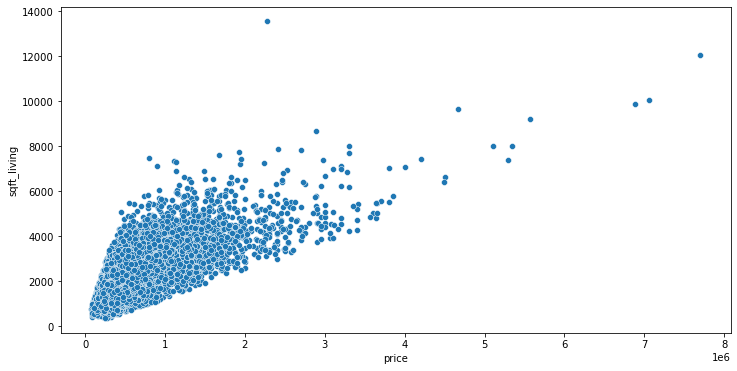

In [10]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='price', y='sqft_living') # linear relationship

<AxesSubplot: xlabel='bedrooms', ylabel='price'>

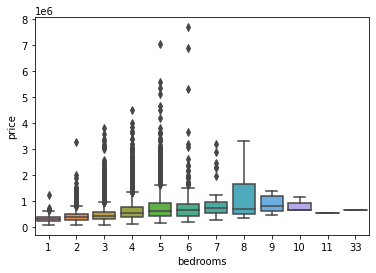

In [11]:
sns.boxplot(data=df, x='bedrooms', y='price') # distribution of prices per bedrooms

<AxesSubplot: xlabel='price', ylabel='long'>

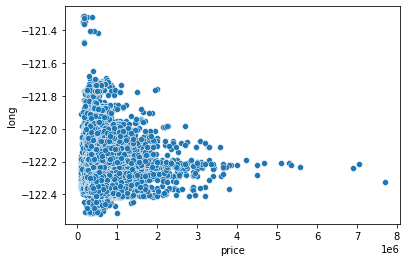

In [12]:
sns.scatterplot(data=df, x='price', y='long')

<AxesSubplot: xlabel='price', ylabel='lat'>

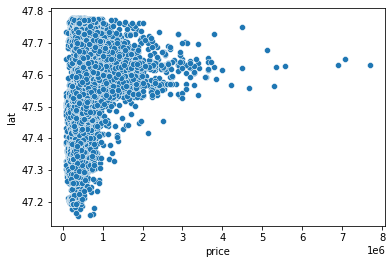

In [13]:
sns.scatterplot(data=df, x='price', y='lat')

#### Visualisation of 5 most expensive and 5 cheapest houses in King County, USA

In [14]:
df_copy = df.copy()

locations = df_copy[['lat', 'long']]

def generateMap(default_location=[df_copy.lat[0], df_copy.long[0]], scale=True):
    map = folium.Map(location=default_location, control_scale=scale)
    return map

map = generateMap()
# plot top 5 expensive
for _ in range(6):
    min_val, max_val = df_copy.iloc[df_copy.price.idxmin()], df_copy.iloc[df_copy.price.idxmax()]
    folium.Marker([min_val.lat, min_val.long], 
              popup=f"Price (Expensive): ${max_val.price}",
              icon=folium.Icon(color='blue')).add_to(map)
    
    folium.Marker([max_val.lat, max_val.long], 
              popup=f"Price (Cheapest): ${max_val.price}",
              icon=folium.Icon(color='red')).add_to(map)
    
    df_copy = df_copy.drop(df_copy.index[df_copy.price.idxmax()])

In [15]:
map

Are waterfront houses more expensive than non-waterfront houses?

<AxesSubplot: xlabel='waterfront', ylabel='price'>

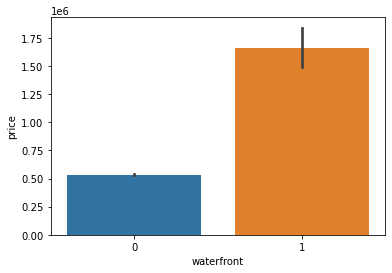

In [16]:
sns.barplot(data=df, x='waterfront', y='price')

In [17]:
df_waterfront = df[df.waterfront == 1]

top_vals = df_waterfront.sort_values(by=['price'], ascending=False)[:10]

waterfront_map = generateMap()

color = ''

for i, n in df_waterfront.iterrows():
    if n.price in top_vals.price.values:
        color = 'red'
    else:
        color = 'blue'
        
    folium.Marker([n.lat, n.long], icon=folium.Icon(color=color), tooltip=f"Price: {n.price}").add_to(waterfront_map)


In [18]:
top_vals.price

3910     7060000.0
1313     5300000.0
1162     5110000.0
8085     4670000.0
2624     4500000.0
2083     3850000.0
6502     3650000.0
15241    3640000.0
2862     3600000.0
21560    3570000.0
Name: price, dtype: float64

In [19]:
waterfront_map

### Feature Engineering

In [20]:
# import datetime as dt

# df['date'] = pd.to_datetime(df['date'])

# df['year'] = df['date'].dt.year
# df['month'] = df['date'].dt.month

In [21]:
# df = df.drop('id', axis=1)